# Assignment 1

*Dency Claris Thomas*

*Datset 6*

(a) Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs
induced on the chosen ten nodes.

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
# Load facebook ego dataset
facebook_edges_file = 'datasets/1684.edges'
G = nx.read_edgelist(facebook_edges_file)

In [3]:
# Select ten random nodes from the graph
chosen_nodes = random.sample(list(G.nodes()), 10)

# Create a subgraph induced on the ten chosen nodes
subgraph = G.subgraph(chosen_nodes)

# Display the subgraph details
print("Nodes in the subgraph:", subgraph.nodes())
print("Edges in the subgraph:", subgraph.edges())

Nodes in the subgraph: ['1666', '2759', '2740', '1656', '2708', '2715', '2803', '2757', '2751', '2765']
Edges in the subgraph: [('1666', '1656')]


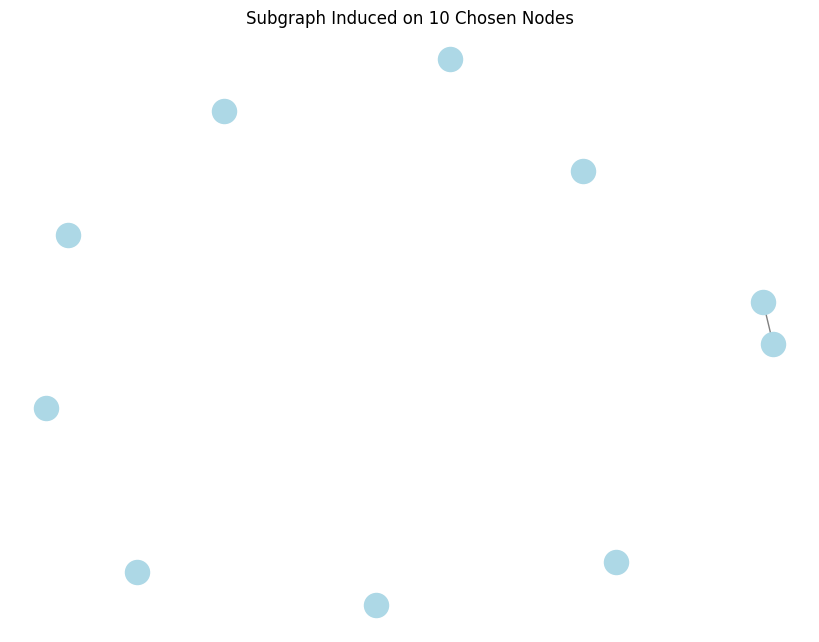

In [4]:
#Plot the subgraph
plt.figure(figsize=(8,6))
nx.draw(subgraph, node_color = 'lightblue', edge_color = 'gray', node_size = 300, with_labels = False)
plt.title("Subgraph Induced on 10 Chosen Nodes")
plt.show()

(b) Please list three algorithms for community detection.

1. **Girvan-Newman Algorithm (Edge Betweenness)**       
*Type:* Divisive Hierarchical Clustering       
*How it works:* The algorithm progressively removes edges with the highest "betweenness centrality" (i.e., edges that are most involved in shortest paths between nodes). By removing these "bridge" edges, it separates the graph into distinct communities.       
*Use Case:* This algorithm is well-suited for graphs where communities are loosely connected to each other via a few key edges.



2. **Louvain Algorithm**       
*Type:* Modularity Optimization       
*How it works:* The algorithm optimizes the modularity of the graph, which is a measure of the density of edges within communities compared to edges between communities. It does this iteratively by assigning nodes to communities to maximize modularity, then collapsing communities into "supernodes" and repeating the process.        
*Use Case:* Popular for large networks due to its efficiency and ability to detect high-quality communities.



3. **Label Propagation Algorithm (LPA)**       
*Type:* Propagation-based       
*How it works:* Initially, each node is assigned a unique label. During each iteration, nodes update their label based on the most frequent label of their neighbors. This process continues until the labels stop changing. The result is that nodes with similar neighbors tend to share the same label, forming communities.       
*Use Case:* LPA is fast and works well for large networks, but it may return different results on each run due to its randomness.

(c) Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. Please plot graphs to show the communities (mark nodes with different
colors / draw communities unions....).

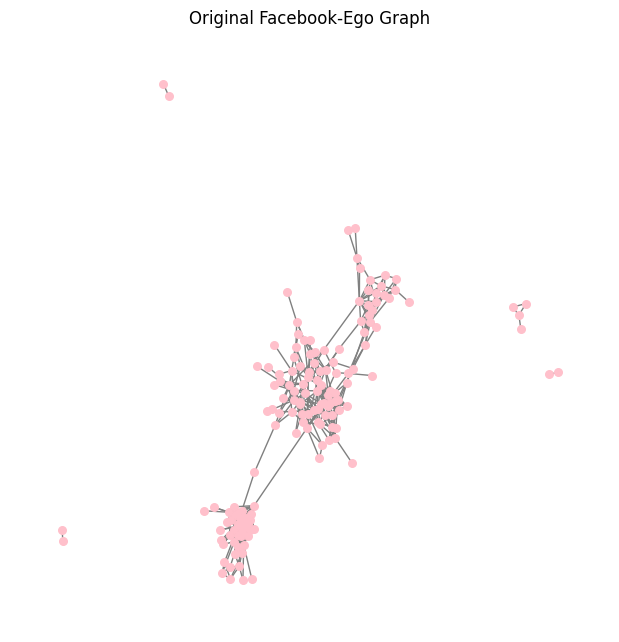

In [5]:
# Draw the original graph
plt.figure(figsize =(6,6))
nx.draw(G, node_size = 30, node_color = 'pink', edge_color = 'gray', with_labels = False)
plt.title("Original Facebook-Ego Graph")
plt.show()

**Girvan-Newman Algorith**

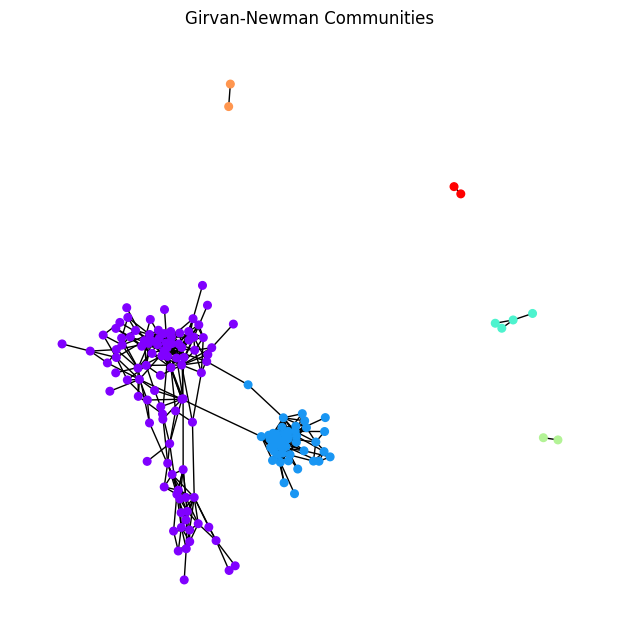

In [6]:
from networkx.algorithms.community import girvan_newman
import itertools

# Girvan-Newman Algorith
girvan_communities = girvan_newman(G)
top_level_communities = next(itertools.islice(girvan_communities, 1))
community_mapping = {node: i for i, community in enumerate(top_level_communities) for node in community}

# Plot Girvan-Newman communities
plt.figure(figsize = (6,6))
nx.draw(G, pos = nx.spring_layout(G), node_color = [community_mapping.get(node) for node in G.nodes()], node_size = 30, cmap = plt.cm.rainbow, with_labels = False)
plt.title("Girvan-Newman Communities")
plt.show()

**Louvain Algorithm**

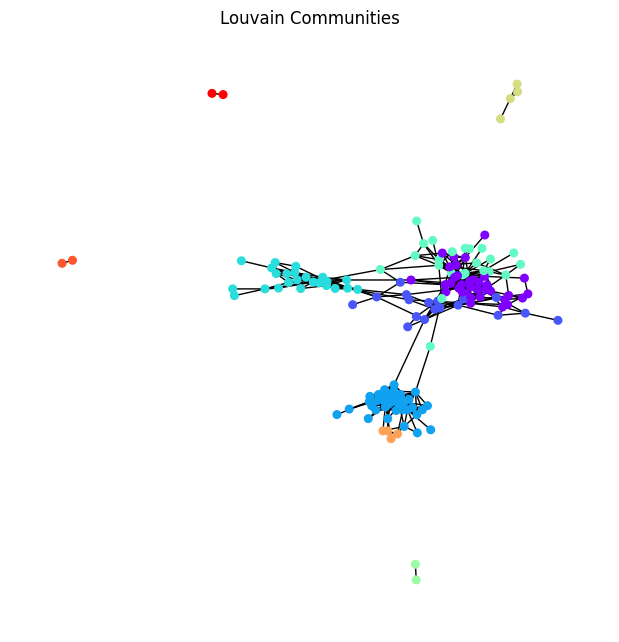

In [7]:
import community as community_louvain

# Louvain Algorithm
louvain_partition = community_louvain.best_partition(G)

# Plot Louvain communities
plt.figure(figsize = (6,6))
nx.draw(G, pos = nx.spring_layout(G), node_color = [louvain_partition.get(node) for node in G.nodes()], node_size = 30, cmap = plt.cm.rainbow, with_labels = False)
plt.title("Louvain Communities")
plt.show()

**Label Propagation Algorithm**

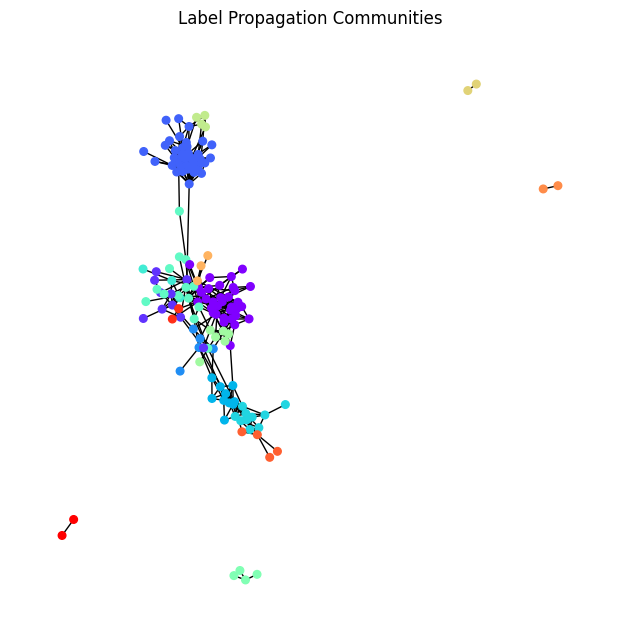

In [8]:
from networkx.algorithms.community import label_propagation_communities

# Label Propagation Algorithm
lp_communities = list(label_propagation_communities(G))
lp_mapping = {node: i for i, community in enumerate(lp_communities) for node in community}

# Plot Label Propagation communities
plt.figure(figsize = (6,6))
nx.draw(G,pos = nx.spring_layout(G), node_color = [lp_mapping.get(node) for node in G.nodes()], node_size = 30, cmap = plt.cm.rainbow, with_labels = False)
plt.title("Label Propagation Communities")
plt.show()

(d) What are the differences between the community detection results shown in (c)? What are the possible reasons?


#### Comparison of Results:

*Number of Communities:*

* Girvan-Newman detects small communities (due to edge centrality-based splitting).
* Louvain tends to find fewer, larger communities (due to its focus on modularity).
* Label Propagation can lead to communities that vary in size and may not be as well-defined or consistent.


*Community Boundaries:*

* Girvan-Newman clearly delineates communities based on edge betweenness, resulting in sharp boundaries.
* Louvain merges nodes into larger clusters, so boundaries between communities are more diffused.
* Label Propagation is more flexible and can sometimes blur the lines between communities due to its propagation mechanism.


*Sensitivity to Network Structure:*

* Girvan-Newman is sensitive to bridge edges (edges that connect different clusters), and its communities may be influenced by a few key edges.
* Louvain is driven by modularity and is more global in its view of the network structure.
* Label Propagation is local and based on neighboring relationships, making it susceptible to noise or random fluctuations in node labels.


#### Possible Reasons for Differences:

* *Approach Differences:* Each algorithm uses a different method (edge betweenness, modularity optimization, label propagation), so the results vary based on how they define communities.

* *Granularity:* Girvan-Newman may detect more fine-grained communities, while Louvain detects larger clusters, and Label Propagation might detect communities based on local interactions rather than global structure.

* *Randomness in Label Propagation:* Label Propagation can yield slightly different results in different runs due to its random label assignment and iterative update process.

* *Network Topology:* The structure of the network influences the detection. For example, networks with clear hub-and-spoke structures may lead to very different results across algorithms (Girvan-Newman splitting hub connections vs. Louvain merging them into broader communities).

